In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from torch import FloatTensor
from torchvision.utils import make_grid

In [2]:
from tang_jcompneuro.cnn_exploration import neuron_to_explore_idx
from tang_jcompneuro.io import load_neural_dataset, load_image_dataset
from tang_jcompneuro.cell_classification import compute_cell_classification

In [3]:
cell_class_dict = compute_cell_classification('MkA_Shape', 3)

In [4]:
a = neuron_to_explore_idx()

In [5]:
b = neuron_to_explore_idx(merged=True)
print(b)

OrderedDict([('OT', [36, 114, 156, 308, 323, 484, 521, 578, 618, 654, 696, 796, 1043, 1079]), ('all', [4, 33, 36, 114, 415, 480, 501, 630, 717, 906, 924, 1079, 1117, 1134])])


In [6]:
a

OrderedDict([('OT',
              OrderedDict([('CV',
                            OrderedDict([(323, 0.70872981091804665),
                                         (696, 0.68706647219816752)])),
                           ('CN',
                            OrderedDict([(156, 0.74571668967838267),
                                         (521, 0.69563250356667516)])),
                           ('CRS',
                            OrderedDict([(36, 0.71244486069117374),
                                         (1079, 0.62678787533449198)])),
                           ('Other',
                            OrderedDict([(484, 0.69287119122077057),
                                         (796, 0.66312340231886524)])),
                           ('Multi',
                            OrderedDict([(308, 0.80721939022895484),
                                         (1043, 0.80151232248758175)])),
                           ('SS',
                            OrderedDict([(114, 0.95117955021411

In [7]:
# check that they really like what they claim.
#     #     'CV': 'curvature',
#     'CN': 'corner',
#     'CRS': 'cross',
#     'Other': 'composition',
#     'Multi': 'mixed',
#     'SS': 'classical',
#     'EB': 'end-stopping',

name_mapping_dict = {
    'CV': 'curvature',
    'CN': 'corner',
    'CRS': 'cross',
    'Other': 'composition',
    'Multi': 'mixed',
    'SS': 'classical',
    'EB': 'end-stopping',
}
images = load_image_dataset('Shape_9500', normalize_cnn_format=True)
responses = load_neural_dataset('MkA_Shape')

In [8]:
def show_everything():
    for subset, dict_this_subset in a.items():
        print(f'working on subset {subset}')
        for class_this, class_this_dict in dict_this_subset.items():
            print(f'working on class {name_mapping_dict[class_this]}')
            # for each one, show top 20
            class_classification_this = cell_class_dict[class_this]
            assert class_classification_this.shape == (1142,)
            assert class_classification_this.dtype == np.bool_
            for neuron_idx, ccmax_this in class_this_dict.items():
                assert class_classification_this[neuron_idx]
                y_this = responses[:, neuron_idx]
                X_top_this = images[np.argsort(y_this)[::-1][:20]]
                X_top_this = make_grid(FloatTensor(X_top_this)[:20], nrow=10, normalize=False, scale_each=False)
                X_top_this = np.transpose(X_top_this.numpy(), (1, 2, 0))
                plt.close('all')
                plt.figure()
                plt.imshow(X_top_this)
                plt.title('{:d} - {:.2f}'.format(neuron_idx, ccmax_this))
                plt.show()

working on subset OT
working on class curvature


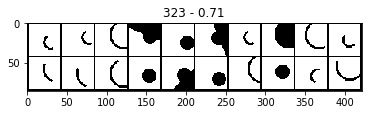

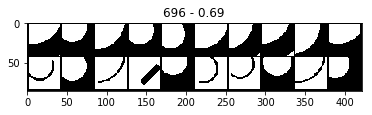

working on class corner


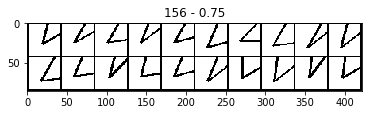

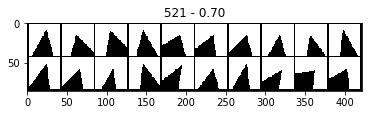

working on class cross


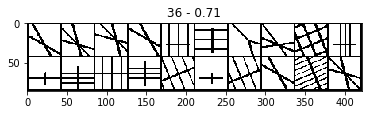

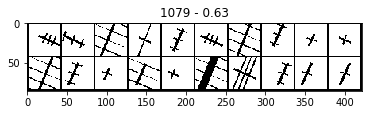

working on class composition


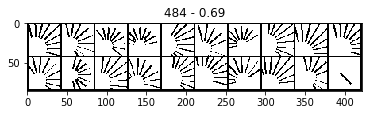

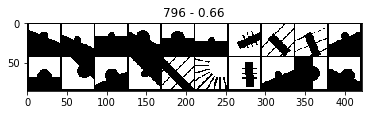

working on class mixed


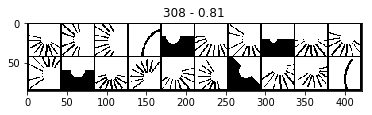

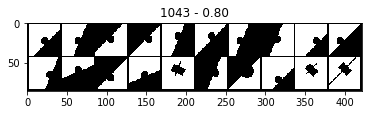

working on class classical


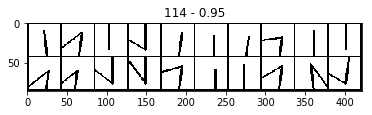

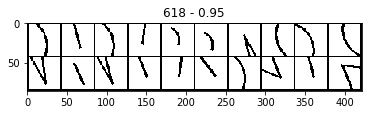

working on class end-stopping


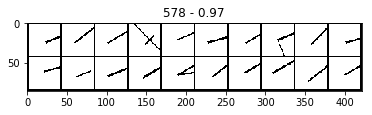

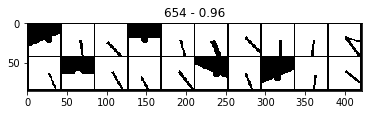

working on subset all
working on class curvature


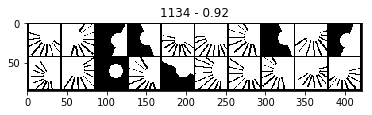

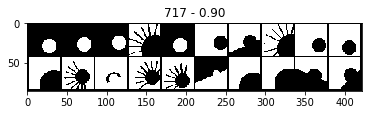

working on class corner


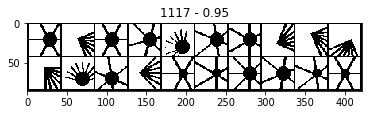

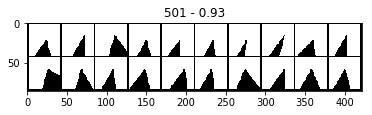

working on class cross


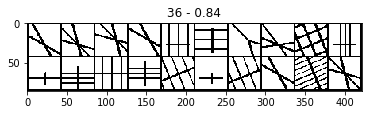

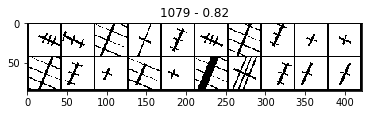

working on class composition


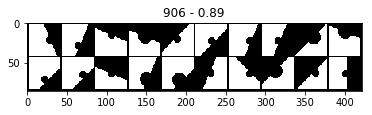

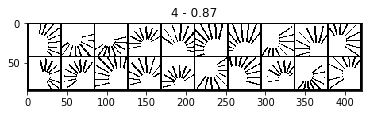

working on class mixed


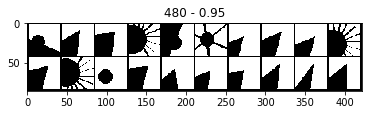

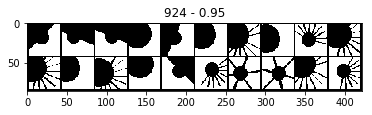

working on class classical


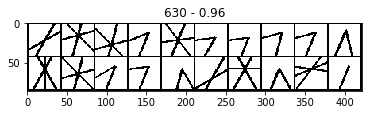

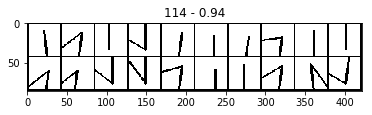

working on class end-stopping


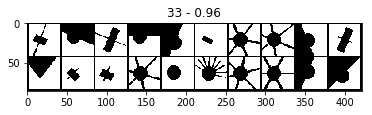

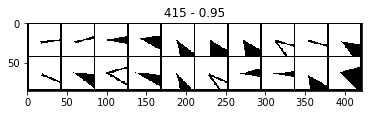

In [9]:
show_everything()